# Policing data


1.Download dataset  from  kaggle.

2.Open your python environment.

3.Move the files into same directory as your notebook.

4.Read the files into pandas(using read_csv)

5.Read about the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
%matplotlib inline

# Preparing the data

1. Examine the data

2. Clean the data

In [3]:
p_d = pd.read_csv("police_project.csv") # police data

In [4]:
p_d.head() # by default return the first 5 rows

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


•	Each row represents one traffic stop.

•	NaN values represent the missing values.


In [5]:
p_d.tail() # by default return the last 5 rows

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
91736,2015-12-31,20:27,NaN,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91737,2015-12-31,20:35,NaN,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,NaN,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,NaN,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
91740,2015-12-31,22:46,NaN,M,1959.0,56.0,Hispanic,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [6]:
p_d.shape  # shape attributes represent the rows and column of the data

(91741, 15)

# Locating missing Values

In [7]:
p_d.isnull() # detecting missing values
p_d.isnull().sum() # .sum() calculates the sum of each column
# True = 1 ,False =0

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

# Dropping Column  that only contains  missing values.

In [8]:
p_d.drop("county_name", axis = 1, inplace = True)
#p_d.dropna(axis="columns",how ="all" or how ="any" ,inlpace =True)

In [9]:
p_d.shape

(91741, 14)

In [10]:
p_d.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

#  Do the men or women speed more often?

driver_gender,violation


In [11]:
p_d[p_d.violation=="Speeding"].driver_gender.value_counts()

M    32979
F    15482
Name: driver_gender, dtype: int64

In [12]:
p_d[p_d.driver_gender == "M"].violation.value_counts(normalize=True)

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

In [13]:
p_d[p_d.driver_gender == "F"].violation.value_counts(normalize=True)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

In [14]:
a=p_d.groupby(["driver_gender"]).violation.value_counts(normalize=True).unstack()

In [15]:
a

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_gender,,,,,,
F,0.105780,0.136277,0.029348,0.043086,0.027009,0.65850
M,0.135671,0.207012,0.057668,0.038461,0.036839,0.52435


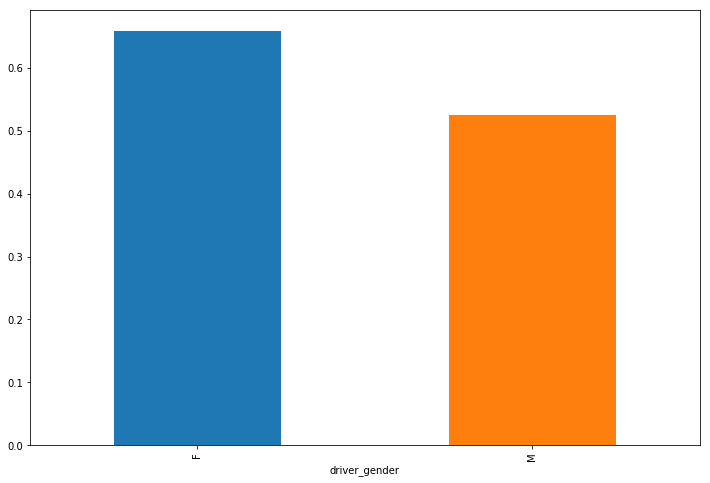

In [16]:
plt.figure(figsize=(12, 8))
a.Speeding.plot(kind="bar")

# Which year had the least number of stops?

In [17]:
p_d.stop_date

0        2005-01-02
1        2005-01-18
2        2005-01-23
3        2005-02-20
4        2005-03-14
5        2005-03-23
6        2005-04-01
7        2005-06-06
8        2005-07-13
9        2005-07-13
10       2005-07-13
11       2005-07-13
12       2005-07-14
13       2005-07-18
14       2005-07-18
15       2005-07-19
16       2005-07-19
17       2005-07-19
18       2005-07-20
19       2005-07-24
20       2005-07-28
21       2005-08-07
22       2005-08-08
23       2005-08-18
24       2005-08-28
25       2005-09-03
26       2005-09-17
27       2005-09-21
28       2005-09-22
29       2005-09-26
            ...    
91711    2015-12-30
91712    2015-12-30
91713    2015-12-30
91714    2015-12-30
91715    2015-12-30
91716    2015-12-30
91717    2015-12-31
91718    2015-12-31
91719    2015-12-31
91720    2015-12-31
91721    2015-12-31
91722    2015-12-31
91723    2015-12-31
91724    2015-12-31
91725    2015-12-31
91726    2015-12-31
91727    2015-12-31
91728    2015-12-31
91729    2015-12-31


In [18]:
p_d['stop_date'] = pd.to_datetime(p_d.stop_date, format="%Y-%M-%d")
p_d["year"] = p_d.stop_date.dt.year

In [19]:
p_d.dtypes

stop_date             datetime64[ns]
stop_time                     object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
year                           int64
dtype: object

In [20]:

p_d.year.value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: year, dtype: int64

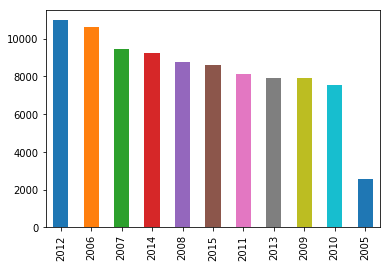

In [21]:

#plt.figure(figsize=(8, 8))
p_d.year.value_counts().plot(kind="bar")

# assignment

#  Does gender affect who gets searched during a stop?


In [22]:
p_d['search_conducted'].sum()

3196

In [23]:
2725 + 471

3196

In [24]:
female = p_d[p_d['driver_gender'] == 'F']
female.describe()

,driver_age_raw,driver_age,year
count,23510.000000,23464.000000,23511.00000
mean,1974.766610,32.607399,2010.35494
std,78.571049,12.156173,3.08640
min,0.000000,15.000000,2005.00000
25%,1969.000000,23.000000,2007.00000
50%,1981.000000,29.000000,2011.00000
75%,1987.000000,41.000000,2013.00000
max,2919.000000,99.000000,2015.00000


In [25]:
female.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23511 entries, 4 to 91737
Data columns (total 15 columns):
stop_date             23511 non-null datetime64[ns]
stop_time             23511 non-null object
driver_gender         23511 non-null object
driver_age_raw        23510 non-null float64
driver_age            23464 non-null float64
driver_race           23511 non-null object
violation_raw         23511 non-null object
violation             23511 non-null object
search_conducted      23511 non-null bool
search_type           471 non-null object
stop_outcome          23511 non-null object
is_arrested           23511 non-null object
stop_duration         23511 non-null object
drugs_related_stop    23511 non-null bool
year                  23511 non-null int64
dtypes: bool(2), datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 2.6+ MB


In [26]:
female_search = female[female['search_conducted'] == True]
female_search

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,year
209,2005-01-07 00:10:00,12:45,F,1981.0,24.0,Black,Speeding,Speeding,True,Incident to Arrest,Arrest Passenger,True,16-30 Min,False,2005
488,2005-01-20 00:10:00,01:52,F,1986.0,19.0,White,Speeding,Speeding,True,Inventory,Arrest Driver,True,16-30 Min,False,2005
866,2005-01-01 00:11:00,02:45,F,1986.0,19.0,White,Speeding,Speeding,True,Probable Cause,Citation,False,16-30 Min,False,2005
899,2005-01-02 00:11:00,01:45,F,1987.0,18.0,Black,Registration Violation,Registration/plates,True,Incident to Arrest,Arrest Driver,True,30+ Min,False,2005
900,2005-01-02 00:11:00,01:45,F,1987.0,18.0,Black,Registration Violation,Registration/plates,True,Incident to Arrest,Arrest Driver,True,30+ Min,False,2005
1238,2005-01-12 00:11:00,16:00,F,1986.0,19.0,White,Other Traffic Violation,Moving violation,True,Incident to Arrest,Arrest Driver,True,16-30 Min,False,2005
1303,2005-01-15 00:11:00,06:50,F,1986.0,19.0,White,Registration Violation,Registration/plates,True,Inventory,Citation,False,0-15 Min,False,2005
1391,2005-01-17 00:11:00,23:30,F,1962.0,43.0,Black,Registration Violation,Registration/plates,True,Incident to Arrest,Arrest Driver,True,16-30 Min,False,2005
2126,2005-01-13 00:12:00,08:41,F,1966.0,39.0,Black,Other Traffic Violation,Moving violation,True,Inventory,Arrest Driver,True,16-30 Min,False,2005
2692,2006-01-06 00:01:00,10:40,F,1983.0,23.0,White,Registration Violation,Registration/plates,True,Incident to Arrest,Arrest Passenger,True,16-30 Min,False,2006


In [27]:
female_search.sum()

driver_age_raw        932660.0
driver_age             14003.0
search_conducted         471.0
drugs_related_stop        96.0
year                  946663.0
dtype: float64

In [28]:
male = p_d[p_d['driver_gender'] == 'M']
male

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,year
0,2005-01-02 00:01:00,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
1,2005-01-18 00:01:00,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
2,2005-01-23 00:01:00,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
3,2005-01-20 00:02:00,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2005
5,2005-01-23 00:03:00,09:45,M,1982.0,23.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,2005
6,2005-01-01 00:04:00,17:30,M,1969.0,36.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
8,2005-01-13 00:07:00,10:15,M,1970.0,35.0,Black,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
9,2005-01-13 00:07:00,15:45,M,1970.0,35.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
10,2005-01-13 00:07:00,16:20,M,1979.0,26.0,Asian,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
12,2005-01-14 00:07:00,19:55,M,1979.0,26.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005


In [29]:
male.describe()

,driver_age_raw,driver_age,year
count,62895.000000,62649.000000,62895.000000
mean,1968.954718,34.537886,2010.246331
std,120.258991,12.911075,3.030050
min,0.000000,15.000000,2005.000000
25%,1966.000000,24.000000,2008.000000
50%,1979.000000,31.000000,2010.000000
75%,1986.000000,43.000000,2013.000000
max,8801.000000,94.000000,2015.000000


In [30]:
male.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62895 entries, 0 to 91740
Data columns (total 15 columns):
stop_date             62895 non-null datetime64[ns]
stop_time             62895 non-null object
driver_gender         62895 non-null object
driver_age_raw        62895 non-null float64
driver_age            62649 non-null float64
driver_race           62895 non-null object
violation_raw         62895 non-null object
violation             62895 non-null object
search_conducted      62895 non-null bool
search_type           2725 non-null object
stop_outcome          62895 non-null object
is_arrested           62895 non-null object
stop_duration         62895 non-null object
drugs_related_stop    62895 non-null bool
year                  62895 non-null int64
dtypes: bool(2), datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 6.8+ MB


In [31]:
male_search = male[male['search_conducted'] == True]
male_search

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,year
24,2005-01-28 00:08:00,01:00,M,1979.0,26.0,White,Other Traffic Violation,Moving violation,True,"Incident to Arrest,Protective Frisk",Arrest Driver,True,16-30 Min,False,2005
40,2005-01-01 00:10:00,00:00,M,1988.0,17.0,White,Equipment/Inspection Violation,Equipment,True,Probable Cause,Arrest Driver,True,16-30 Min,True,2005
41,2005-01-01 00:10:00,00:00,M,1988.0,17.0,White,Equipment/Inspection Violation,Equipment,True,Probable Cause,Citation,False,30+ Min,True,2005
80,2005-01-02 00:10:00,09:30,M,1975.0,30.0,White,Speeding,Speeding,True,Incident to Arrest,Arrest Driver,True,30+ Min,False,2005
106,2005-01-03 00:10:00,14:00,M,1978.0,27.0,Black,Equipment/Inspection Violation,Equipment,True,Probable Cause,Citation,False,16-30 Min,False,2005
118,2005-01-04 00:10:00,01:20,M,1956.0,49.0,White,Other Traffic Violation,Moving violation,True,Incident to Arrest,Arrest Driver,True,30+ Min,True,2005
139,2005-01-05 00:10:00,00:20,M,1980.0,25.0,Black,Equipment/Inspection Violation,Equipment,True,"Probable Cause,Reasonable Suspicion",Arrest Driver,True,16-30 Min,True,2005
163,2005-01-05 00:10:00,22:50,M,1980.0,25.0,Black,Equipment/Inspection Violation,Equipment,True,"Incident to Arrest,Inventory,Probable Cause",N/D,False,30+ Min,False,2005
208,2005-01-07 00:10:00,12:00,M,1947.0,58.0,Black,Other Traffic Violation,Moving violation,True,"Incident to Arrest,Inventory",Arrest Driver,True,16-30 Min,False,2005
210,2005-01-07 00:10:00,13:00,M,1987.0,18.0,Black,Equipment/Inspection Violation,Equipment,True,Incident to Arrest,Arrest Driver,True,16-30 Min,False,2005


In [32]:
male_search.sum()

driver_age_raw        5390881.0
driver_age              83895.0
search_conducted         2725.0
drugs_related_stop        719.0
year                  5476788.0
dtype: float64

# Do most stops occur at night?

In [33]:
night = p_d[p_d['stop_time'] >= '20:00']
night

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,year
2,2005-01-23 00:01:00,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
17,2005-01-19 00:07:00,23:30,M,1979.0,26.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,2005
19,2005-01-24 00:07:00,20:10,F,1958.0,47.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
28,2005-01-22 00:09:00,22:34,M,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
34,2005-01-29 00:09:00,23:45,M,1947.0,58.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
39,2005-01-30 00:09:00,20:17,M,1988.0,17.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
64,2005-01-01 00:10:00,20:00,M,1972.0,33.0,Black,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
65,2005-01-01 00:10:00,20:35,M,1986.0,19.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
66,2005-01-01 00:10:00,23:10,F,1986.0,19.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
67,2005-01-01 00:10:00,23:25,M,1974.0,31.0,Asian,Speeding,Speeding,False,NaN,Citation,False,16-30 Min,False,2005


In [34]:
(p_d['stop_time'] >= '18:00').sum()

18696

In [35]:
(p_d['stop_time'] <= '18:00').sum()

73146

In [36]:
data = p_d[(p_d['stop_time'] >= '18:00') & (p_d['stop_time'] <= '19:00')]
data

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,year
11,2005-01-13 00:07:00,19:00,F,1966.0,39.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
57,2005-01-01 00:10:00,18:10,M,1958.0,47.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
58,2005-01-01 00:10:00,18:13,M,1969.0,36.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
59,2005-01-01 00:10:00,19:00,M,1986.0,19.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
158,2005-01-05 00:10:00,18:00,F,1981.0,24.0,Asian,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
159,2005-01-05 00:10:00,18:00,M,1981.0,24.0,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,16-30 Min,False,2005
192,2005-01-06 00:10:00,18:45,M,1965.0,40.0,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,2005
261,2005-01-09 00:10:00,18:01,M,1942.0,63.0,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,2005
262,2005-01-09 00:10:00,18:32,M,1977.0,28.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
263,2005-01-09 00:10:00,18:39,M,1975.0,30.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005


In [37]:
data.sum()

driver_age_raw        4209873.0
driver_age              73482.0
search_conducted           87.0
drugs_related_stop         22.0
year                  4552642.0
dtype: float64

In [38]:
search = data[data['search_conducted'] == True]
search

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,year
603,2005-01-23 00:10:00,18:40,M,1980.0,25.0,Black,Other Traffic Violation,Moving violation,True,"Incident to Arrest,Inventory",Arrest Driver,True,30+ Min,False,2005
2003,2005-01-07 00:12:00,18:45,M,1964.0,41.0,White,Speeding,Speeding,True,"Probable Cause,Protective Frisk",Citation,False,16-30 Min,False,2005
2513,2005-01-30 00:12:00,18:15,M,1979.0,26.0,Black,Registration Violation,Registration/plates,True,Protective Frisk,Citation,False,16-30 Min,False,2005
2669,2006-01-05 00:01:00,18:20,M,1981.0,25.0,Asian,Speeding,Speeding,True,Incident to Arrest,Arrest Driver,True,30+ Min,False,2006
2751,2006-01-07 00:01:00,18:05,M,1978.0,28.0,White,Speeding,Speeding,True,"Incident to Arrest,Protective Frisk",Arrest Driver,True,30+ Min,False,2006
3040,2006-01-15 00:01:00,18:43,M,1984.0,22.0,White,Registration Violation,Registration/plates,True,Incident to Arrest,Arrest Driver,True,0-15 Min,False,2006
4373,2006-01-01 00:03:00,18:30,M,1985.0,21.0,White,Speeding,Speeding,True,Incident to Arrest,Arrest Driver,True,16-30 Min,False,2006
4813,2006-01-16 00:03:00,18:25,M,1987.0,19.0,White,Speeding,Speeding,True,Probable Cause,Citation,False,30+ Min,True,2006
4814,2006-01-16 00:03:00,18:55,M,1969.0,37.0,White,Registration Violation,Registration/plates,True,Inventory,Citation,False,30+ Min,False,2006
5229,2006-01-30 00:03:00,18:27,M,1985.0,21.0,White,Other Traffic Violation,Moving violation,True,Incident to Arrest,Arrest Driver,True,30+ Min,False,2006


In [39]:
search.sum()

driver_age_raw        172229.0
driver_age              2595.0
search_conducted          87.0
drugs_related_stop        22.0
year                  174824.0
dtype: float64

In [40]:
p_d[(p_d['stop_time'] >= '18:00') & (p_d['stop_time'] <= '19:00')].sum()

driver_age_raw        4209873.0
driver_age              73482.0
search_conducted           87.0
drugs_related_stop         22.0
year                  4552642.0
dtype: float64